```
curl http://127.0.0.1:8080/predictions/${MODEL_NAME} -T 3dogs.jpg -o 3dogs_mask.png
```

In [1]:
import requests
import json
from PIL import Image
import base64
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_image =  "/Users/tseo/Documents/Github/viai-serving/DATA/dent/test/images/20190227_10535_20402100_8621821f5ed8c37bc0b8e6e0efc9cc0a.jpg"
# save_dir = "/Users/tseo/Documents/Github/viai-serving/RESULT/dent"

In [3]:
with open(test_image, 'rb') as f:
    raw = f.read()

In [4]:
data = {'body' : raw}

In [5]:
res = requests.post("http://0.0.0.0:9000/predictions/dent", data=data)

In [6]:
res

<Response [200]>

In [7]:
result = res.content

In [8]:
data_str = result.decode('utf8')
print(type(data_str)) # str

<class 'str'>


In [9]:
data_dict = json.loads(data_str) # dict
print(type(data_dict))

<class 'dict'>


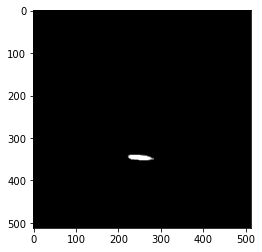

In [10]:
mask_test = np.asarray(data_dict["mask"], dtype="uint8")
mask_test = mask_test * 255 # 1 -> 255
stacked_img = np.stack((mask_test,) * 3, axis=-1) # 1ch -> 3ch
plt.imshow(stacked_img)
plt.show()